In [1]:
import numpy as np
import scanpy as sc
import scvelo as scv
import sys
import torch
import matplotlib.pyplot as plt
import umap
import os.path
sys.path.append('../')
import velovae as vv
from datetime import datetime
import seaborn as sns

In [2]:
torch.cuda.is_available()

True

In [3]:
now = datetime.now()
date = now.strftime("%m_%d_%Y")

In [4]:
dataset = "VV_braindev"
adata = sc.read_h5ad('../../RNA_ATAC/VeloVAE/Braindev_post.h5ad')

In [5]:
model_path_base = f"checkpoints/{dataset}"
figure_path_base = f"figures/{dataset}"
data_path_base = f"data/{dataset}"

In [6]:
gene_plot = ['Tubb3', 'Olig2', 'Dbi', 'Col3a1']
np.all(np.isin(gene_plot, adata.var_names))

True

In [7]:
adata

AnnData object with n_obs × n_vars = 29948 × 2000
    obs: 'Age', 'CellCycle', 'Cell_Conc', 'Chemistry', 'ChipID', 'Class', 'ClusterName', 'Clusters', 'Date_Captured', 'DonorID', 'DoubletFinderPCA', 'HPF_LogPP', 'IsCycling', 'Label', 'Location_E9_E11', 'NCellsCluster', 'NGenes', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'PseudoAge', 'PseudoTissue', 'Region', 'SampleID', 'SampleName', 'Sample_Index', 'Sex', 'Species', 'Split', 'Strain', 'Subclass', 'Target_Num_Cells', 'Tissue', 'TotalUMI', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'tprior', 'clusters', 'n_counts', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'velovae_time', 'velovae_std_t', 'velovae_t0', 'fullvb_time', 'fullvb_std_t', 'fullvb_t0', 'velovae_velocity_consistency', 'velovae_velocity_self_transition', 'fullvb_velocity_consistency', 'fullvb_velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Gamma', 'Selected', 'Start', 'Strand', 'Valid', 'gene_count_c

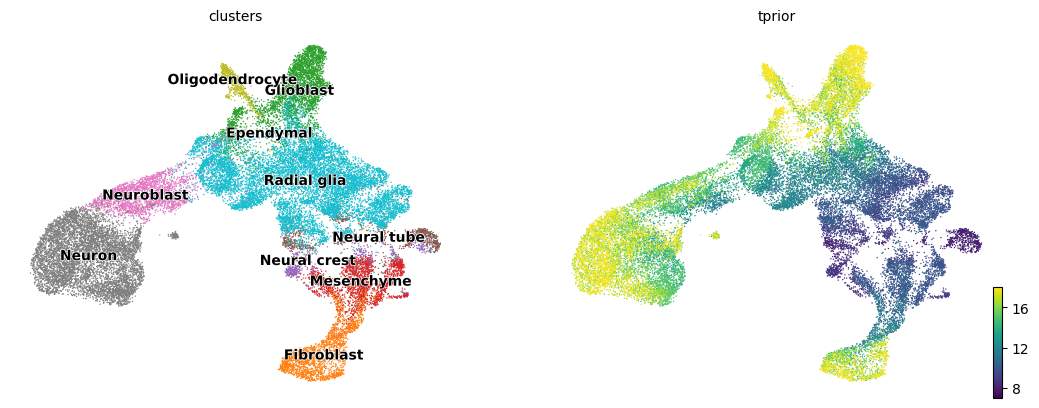

In [8]:
os.makedirs(figure_path_base, exist_ok=True)
scv.pl.scatter(adata, basis='umap', color=['clusters', 'tprior'], legend_loc='on data')

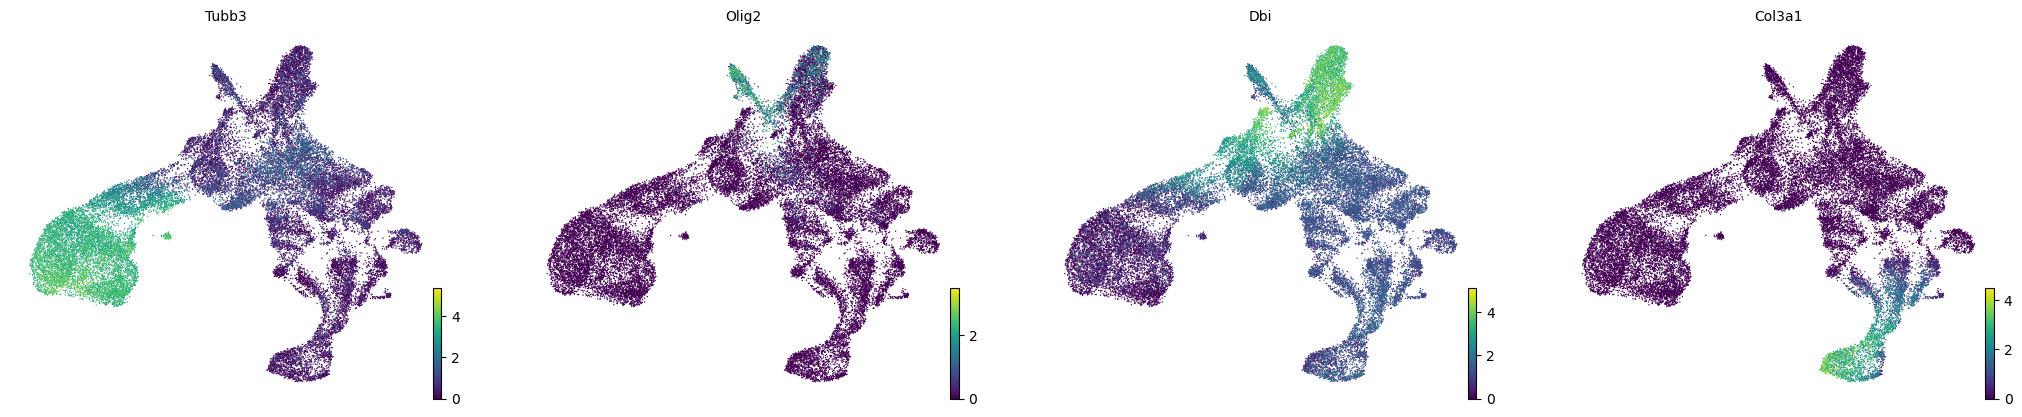

In [9]:
scv.pl.scatter(adata, basis='umap', color=gene_plot)

In [10]:
figure_path = figure_path_base+'/'+date
model_path = model_path_base+'/'+date
data_path = data_path_base

In [11]:
torch.manual_seed(2022)
np.random.seed(2022)
model = vv.VAEChrom(adata,
                    device='cuda:0',
                    plot_init=False,
                    gene_plot=gene_plot,
                    cluster_key="clusters",
                    figure_path=figure_path,
                    embed="umap")

model.train(plot=False,
            gene_plot=gene_plot,
            figure_path=figure_path,
            embed="umap")

model.save_model(model_path)
model.save_anndata(data_path, file_name="out.h5ad")

Running in RNA-only mode.
Latent dimension set to 6.
Learning rate set to 3.6e-4 based on data sparsity.
Early stop threshold set to 1.0.
Using Gaussian Prior.
Initializing using the steady-state and dynamical models.


  0%|          | 0/2000 [00:00<?, ?it/s]

1342 out of 2000 = 67.1% genes have good ellipse fits.
KS-test result: [0. 1. 1. 1. 1. 1. 1.]
Initial induction: 1567, repression: 433 out of 2000.
--------------------------- Train a VeloVAE ---------------------------
*********      Creating Training and Validation Datasets      *********
Total Number of Iterations Per Epoch: 82, test iteration: 162
*********                      Finished.                      *********
*********                      Stage  1                       *********
Epoch 1: Train ELBO = 1759.010, Test ELBO = -28886.076		Total Time =   0 h :  0 m :  2 s
Epoch 50: Train ELBO = 4616.443, Test ELBO = 4619.623		Total Time =   0 h :  0 m : 34 s
Epoch 100: Train ELBO = 4678.848, Test ELBO = 4680.425		Total Time =   0 h :  1 m :  6 s
Epoch 150: Train ELBO = 4701.216, Test ELBO = 4701.297		Total Time =   0 h :  1 m : 38 s
Epoch 200: Train ELBO = 4712.558, Test ELBO = 4714.119		Total Time =   0 h :  2 m : 11 s
Epoch 250: Train ELBO = 4722.968, Test ELBO = 4724.892		To

  0%|          | 0/29948 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.002
Average Set Size: 102
Finished. Actual Time:   0 h :  0 m : 32 s
*********             Velocity Refinement Round 1             *********
Epoch 344: Train ELBO = 4676.564, Test ELBO = 4691.253		Total Time =   0 h :  4 m : 15 s
*********     Round 1: Early Stop Triggered at epoch 344.     *********
*********     Retrieving best model from iteration 28109.      *********
Cell-wise KNN estimation.
Finished. Actual Time:   0 h :  0 m :  5 s
*********             Velocity Refinement Round 2             *********
Epoch 492: Train ELBO = 4391.590, Test ELBO = 4381.878		Total Time =   0 h :  5 m : 51 s
*********     Round 2: Early Stop Triggered at epoch 492.     *********
*********     Retrieving best model from iteration 40178.      *********
Change in x0: 0.244
Cell-wise KNN estimation.
Finished. Actual Time:   0 h :  0 m :  5 s
*********             Velocity Refinement Round 3             *********
Epoch 637: Train ELBO = 4325.737, Test ELBO = 4311.295		Tot

In [12]:
key = 'vae'
basis = "umap"

In [13]:
std_z = adata.obsm[f"{key}_std_z"]
z = adata.obsm[f"{key}_z"]

In [14]:
umap_obj = umap.UMAP(n_neighbors=30, n_components=2, min_dist=0.25, random_state=2022)
z_umap = umap_obj.fit_transform(z)

computing velocity graph (using 1/8 cores)


  0%|          | 0/29948 [00:00<?, ?cells/s]

    finished (0:01:08) --> added 
    'vae_velocity_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:03) --> added
    'vae_velocity_norm_umap', embedded velocity vectors (adata.obsm)


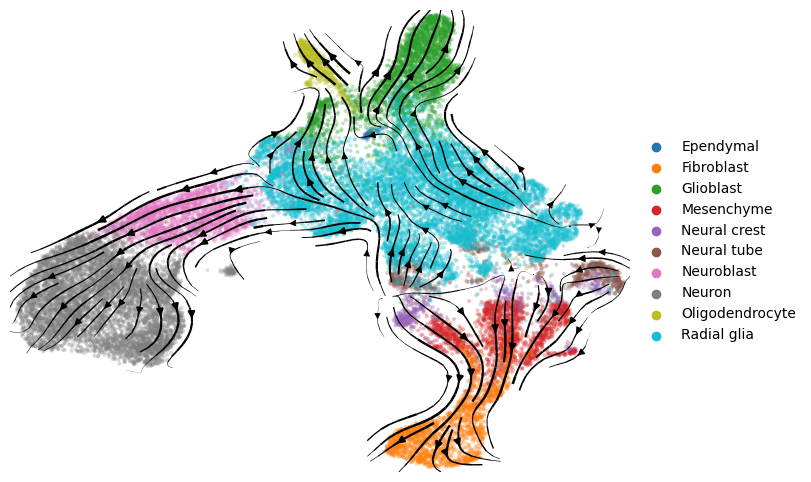

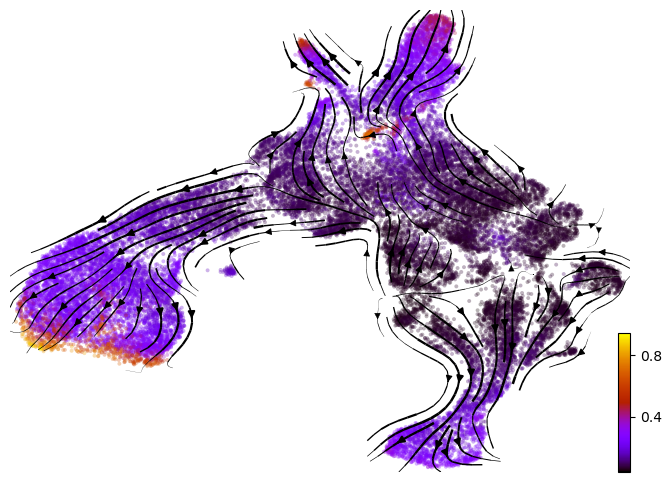

In [15]:
vv.model.velocity_graph(adata, key=key)
vv.velocity_embedding_stream(adata, key=key, basis='umap', color='clusters', title="", figsize=(8,6), legend_loc='right margin')
vv.velocity_embedding_stream(adata, key=key, basis='umap', color=f'{key}_time', color_map='gnuplot', title="", figsize=(8,6), legend_loc='right margin')

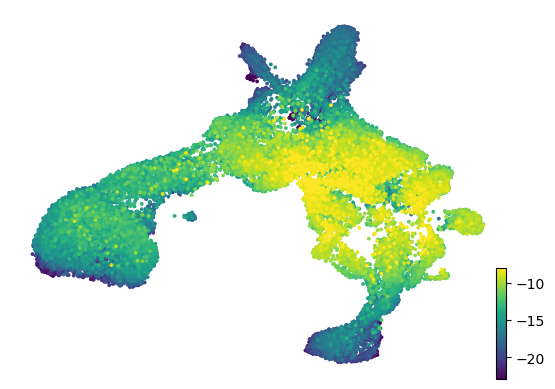

In [16]:
z_norm = np.linalg.norm(z, axis=1).reshape(-1, 1) + 1e-10
diff_entropy = np.sum(np.log(std_z/z_norm), 1) + 0.5*std_z.shape[1]*(1+np.log(2*np.pi))
adata.obs['diff_entropy'] = diff_entropy

scv.pl.umap(adata, color='diff_entropy', size=30, title='', legend_loc='right margin', perc=[1, 99])

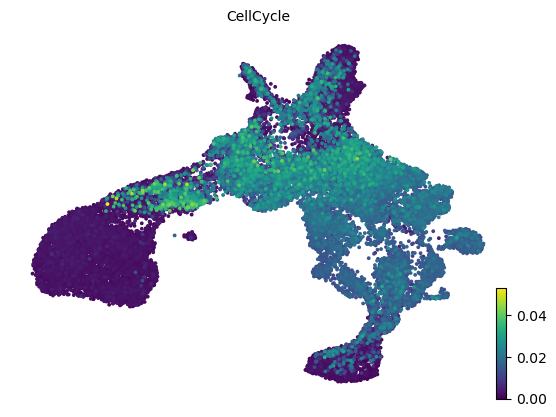

In [17]:
scv.pl.umap(adata, color='CellCycle', size=30)

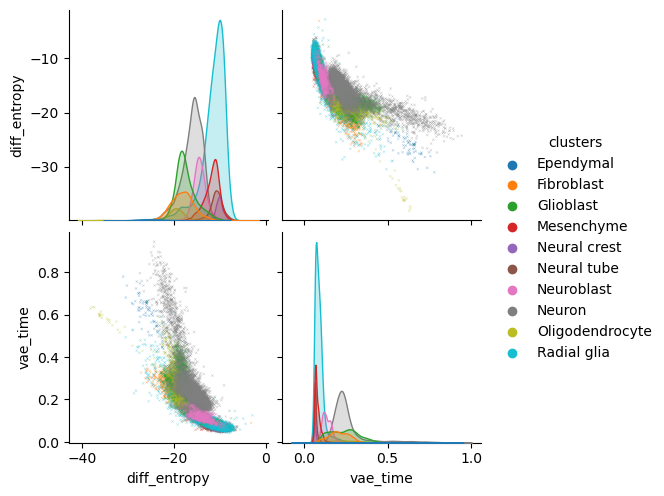

In [18]:
sns.pairplot(adata.obs[['diff_entropy', 'vae_time', 'clusters']], hue='clusters', palette='tab10', plot_kws={"s": 3, "alpha": 0.9}, markers='x');

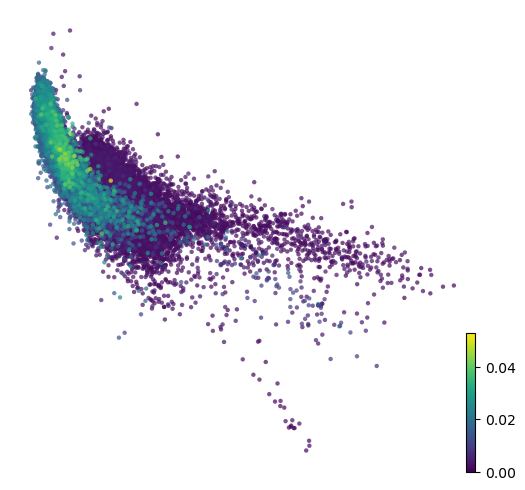

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
scv.pl.scatter(adata, y='diff_entropy', x='vae_time', color='CellCycle', size=40, alpha=0.7, ax=ax, legend_loc='right', frameon=False, title='');

In [20]:
adata.write_h5ad(data_path_base+"/final.h5ad")